# Plotting

In [1]:
# import packages 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings
from PIL import Image

root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

preprocessed_folder = "../../data_2/07_masked_and_smooth"
filename = 'DatasetInfo.csv'
dataframe = pd.read_csv(os.path.join(preprocessed_folder,filename))
dataframe = dataframe[dataframe["channel"]=="C2"]
dataframe.head()

,Unnamed: 0,file name,channel,image quality,notes,folder,full path,original file name,construct
76,76,Projected_C2-D3-4_en_pnr_male_01_20230306.tif,C2,NaN,NaN,../../data_2/07_masked_and_smooth/,../../data_2/06_warped/Projected_C2-D3-4_en_pn...,D3-4_en_pnr_male_01_20230306.tif,D3-4
77,77,Projected_C2-220228_D2xEn-Gal4_2.tif,C2,NaN,NaN,../../data_2/07_masked_and_smooth/,../../data_2/06_warped/Projected_C2-220228_D2x...,220228_D2xEn-Gal4_2.tif,D2
78,78,Projected_C2-220228_D6xEn-Gal4_1.tif,C2,NaN,NaN,../../data_2/07_masked_and_smooth/,../../data_2/06_warped/Projected_C2-220228_D6x...,220228_D6xEn-Gal4_1.tif,D6
79,79,Projected_C2-220312_D2xEn-Gal4_2.tif,C2,NaN,NaN,../../data_2/07_masked_and_smooth/,../../data_2/06_warped/Projected_C2-220312_D2x...,220312_D2xEn-Gal4_2.tif,D2
80,80,Projected_C2-220313_D6xEn-Gal4_1.tif,C2,NaN,NaN,../../data_2/07_masked_and_smooth/,../../data_2/06_warped/Projected_C2-220313_D6x...,220313_D6xEn-Gal4_1.tif,D6


#### Average phenotype plot

In [2]:
%matplotlib widget

def average_phenotype(dataframe, folder, construct=None, quality=None, sex = None):
    if construct:
        dataframe = dataframe[dataframe['construct']==construct]
    if quality:
        dataframe = dataframe[dataframe['image quality']==quality]
    if sex:
        dataframe = dataframe[dataframe['sex']==sex]
    
    image_names = dataframe["file name"].values
    print(len(image_names))
    
    temp_image = Image.open(os.path.join(folder,image_names[0]))
    image = np.asarray(temp_image)/len(image_names)
    
    for image_file_name in image_names[1:]:
        temp_image = Image.open(os.path.join(folder,image_file_name))
        temp_image = np.asarray(temp_image)/len(image_names)
        image = (image + temp_image)
        
    return image

6
14
2
2


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
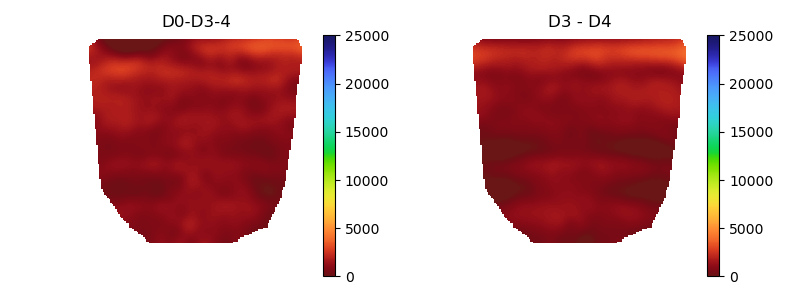

In [21]:
import matplotlib.colors as clr
yann_colormap = "/media/ceolin/Data/Lab Gompel/Various/Yann_colormap.lut"
colors = np.genfromtxt(yann_colormap, delimiter = ",")/255
colors = np.flipud(colors)
jetblack = clr.LinearSegmentedColormap.from_list('custom_jet', colors, N=255)
    

import numpy.ma as ma

mask_filename = '../../data_2/07_masked_and_smooth/mask.tif'
mask = 1-np.asarray(Image.open(mask_filename))

construct1 = "D0"
construct2 = "D3"
construct3 = "D4"
construct4 = "D3-4"

cmap = jetblack 

xlim = [20,160]
ylim = [25,180]

D0 = average_phenotype(dataframe, preprocessed_folder, construct=construct1)
D3 = average_phenotype(dataframe, preprocessed_folder, construct=construct2)
D4 = average_phenotype(dataframe, preprocessed_folder, construct=construct3)
D3_4 = average_phenotype(dataframe, preprocessed_folder, construct=construct4)

D0 = ma.masked_array(D0, mask=mask)
D3 = ma.masked_array(D3, mask=mask)
D4 = ma.masked_array(D4, mask=mask)
D3_4 = ma.masked_array(D3_4, mask=mask)

diff_D0_D34 = D0 - D3_4
diff_D3_D4 = D3 - D4

fig, axes = plt.subplots(1,2,figsize=(8, 3))

im0 = axes[0].imshow(diff_D0_D34,   cmap=cmap)
axes[0].set_title("D0-D3-4")
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].axis('off')
im0.set_clim(0,25000)
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(diff_D3_D4,   cmap=cmap)
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title("D3 - D4")
axes[1].axis('off')
im1.set_clim(0,25000)
fig.colorbar(im1, ax=axes[1])


plt.tight_layout()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
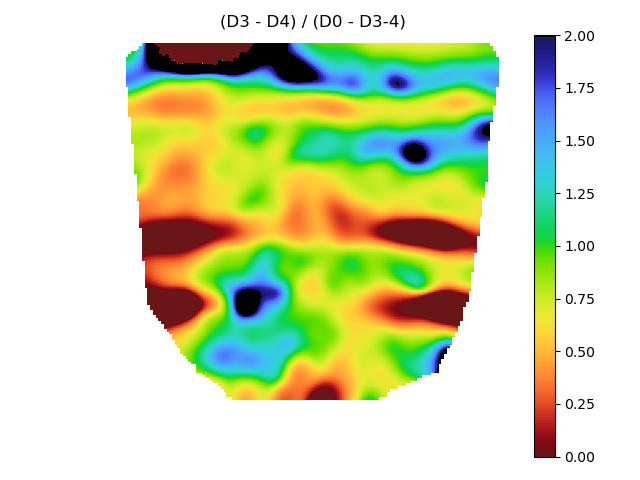

In [26]:
fig, ax = plt.subplots()
im1 = ax.imshow(diff_D3_D4/diff_D0_D34,   cmap=cmap)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("(D3 - D4) / (D0 - D3-4)")
ax.axis('off')
im1.set_clim(0,2)
fig.colorbar(im1, ax=ax)
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
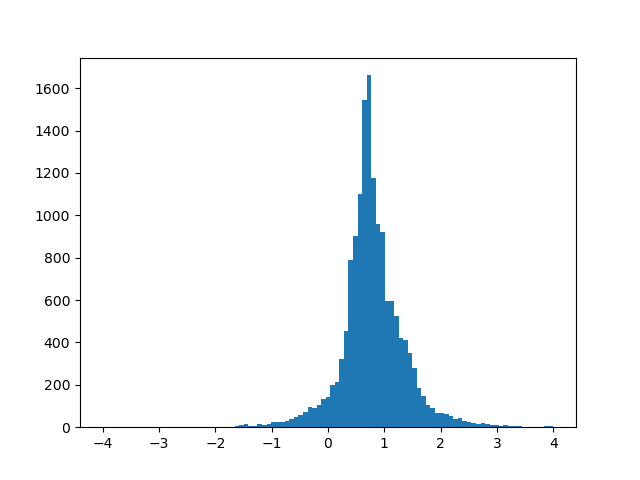

In [24]:
fig, ax = plt.subplots()
HIST_BINS = np.linspace(-4, 4, 100)
ratios = (diff_D3_D4[diff_D0_D34>0]/diff_D0_D34[diff_D0_D34>0]).flatten()
h = ax.hist(ratios, bins = HIST_BINS)

# PCA Analysis

In [10]:
# import packages 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings


root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)
from src.PCA_analysis import *

preprocessed_folder = "/media/ceolin/Data/Lab Gompel/Projects/Fly_Abdomens/data_2/07_masked_and_smooth"
filename = 'DatasetInfo.csv'
dataframe = pd.read_csv(os.path.join(preprocessed_folder,filename))
mask_filename = '/media/ceolin/Data/Lab Gompel/Projects/Fly_Abdomens/data_2/07_masked_and_smooth/mask.tif'
dataframe = dataframe[dataframe["channel"]=="C2"]
dataframe = dataframe[dataframe["image quality"]!="bad"]
dataframe = dataframe.reset_index()
dataframe = reshape_for_PCA(dataframe, mask_filename)
variable = "I"
dataframe = PCA_analysis(dataframe, n_components=4, PCA_variable=variable, option="all")
dataframe = dataframe.reset_index()

Reshaping data for PCA
Start PCA analysis


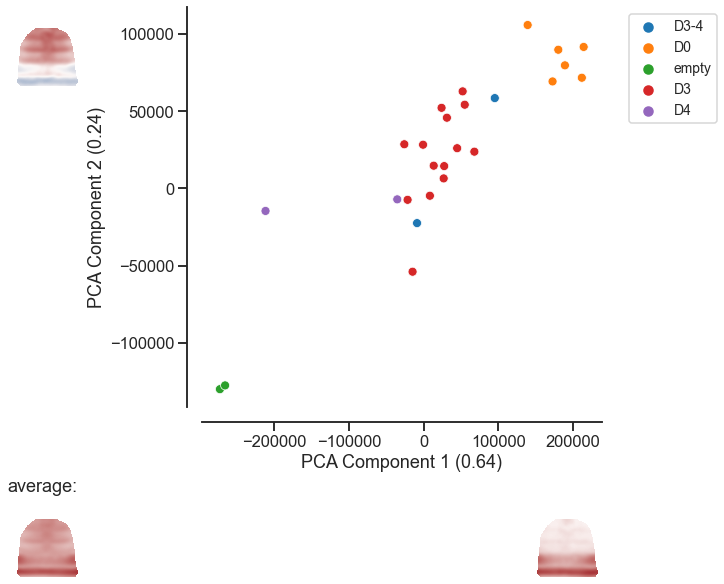

In [11]:
dataframe = dataframe[dataframe["construct"].isin(["D4", "D3", "D0", "D3-4", "empty"])]
plot_PCA_2D(dataframe, comp1=1, comp2=2, PCA_variable=variable, figsize=(10,8), reverse_x = True, reverse_y = True)

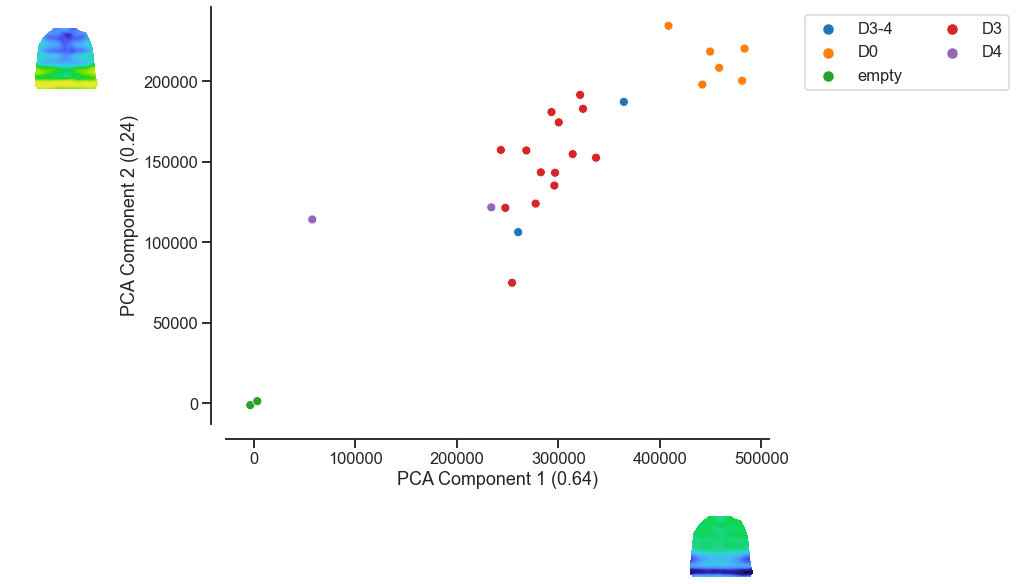

In [12]:
import matplotlib.colors as clr
yann_colormap = "/media/ceolin/Data/Lab Gompel/Various/Yann_colormap.lut"
colors = np.genfromtxt(yann_colormap, delimiter = ",")/255
colors = np.flipud(colors)
jetblack = clr.LinearSegmentedColormap.from_list('custom_jet', colors, N=255)
  

plot_rotate_PCA_2D(dataframe, comp1=1, comp2=2, PCA_variable=variable, v1_x=-1, v1_y = 0, v2_x=0, v2_y=-1, origin="empty", figsize=(14,8), cmap=jetblack)

# Regulatory information loss


In [3]:
# import packages 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings
from PIL import Image


root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

preprocessed_folder = "/media/ceolin/Data/Lab Gompel/Projects/Fly_Abdomens/data_2/07_masked_and_smooth"
filename = 'DatasetInfo.csv'
dataframe = pd.read_csv(os.path.join(preprocessed_folder,filename))
dataframe = dataframe[dataframe["channel"]=="C2"]
dataframe = dataframe[dataframe['image quality']=="good"]
dataframe = dataframe[dataframe['construct'].isin(["D0", "D6", "D3", "D2", "empty"])]

def average_phenotype(dataframe, folder, construct=None):
    if construct:
        dataframe = dataframe[dataframe['construct']==construct]

    image_names = dataframe["file name"].values
    
    temp_image = Image.open(os.path.join(folder,image_names[0]))
    image = np.asarray(temp_image)/len(image_names)
    
    for image_file_name in image_names[1:]:
        temp_image = Image.open(os.path.join(folder,image_file_name))
        temp_image = np.asarray(temp_image)/len(image_names)
        image = (image + temp_image)
        
    return image

average_D0 = average_phenotype(dataframe, preprocessed_folder, "D0")

image_names = dataframe["file name"].values
dataframe["distance"] = 0

for image_file_name in image_names[1:]:
    temp_image = np.asarray(Image.open(os.path.join(preprocessed_folder,image_file_name)))
    distance_from_D0 = np.sum(np.power(average_D0 - temp_image,2))
    dataframe.loc[dataframe["file name"]==image_file_name, "distance"] = distance_from_D0

dataframe["boundary"] = 0
dataframe.loc[dataframe["construct"] == "D0", "boundary"] = -5419
dataframe.loc[dataframe["construct"] == "D6", "boundary"] = -2519
dataframe.loc[dataframe["construct"] == "D3", "boundary"] = -3190
dataframe.loc[dataframe["construct"] == "D2", "boundary"] = -3496
dataframe.loc[dataframe["construct"] == "empty", "boundary"] = 0

# normalization

av_dist_empty = dataframe.loc[dataframe["construct"] == "empty", "distance"].mean()
dataframe["distance"] = dataframe["distance"]/av_dist_empty

/tmp/ipykernel_42468/2464285572.py:15: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(k*(x-x0)))


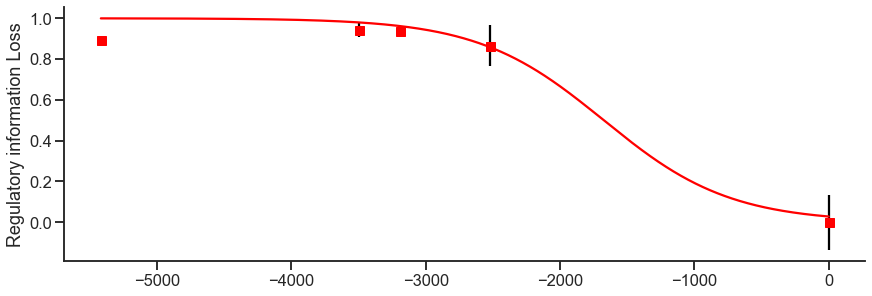

In [37]:
fig = plt.figure(constrained_layout=True, figsize=(12,4))
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
x = dataframe.groupby("construct").mean()["boundary"].values
y = dataframe.groupby("construct").mean()["distance"].values
e = dataframe.groupby("construct").std()["distance"].values
plt.errorbar(x, 1-y, yerr=e, fmt='s', color="red", ecolor = "black")
sns.despine()
plt.ylabel("Regulatory information Loss")

# definitions and import for fitting:
from scipy.optimize import curve_fit
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(k*(x-x0)))
    return (y)

# read data for fitting:
x = dataframe["boundary"].values
y = 1-dataframe["distance"].values

# guess on parameters:
p0 = [-3000, 0.01]
popt, pcov = curve_fit(sigmoid, x, y, p0, method='dogbox')

# plotting the curve:
sigm_x = np.linspace(min(x), max(x), 1000)
sigm_y = sigmoid(sigm_x, *popt)
plt.plot(sigm_x,sigm_y, c = "red")